In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Analysis of Chicago crime data from 2001 to 2023
In this project, we intend to analize the data about crimes committed in the city of Chicago. Firt we are going to perform an Exploratory Data Analysis to get to know better our dataset, make transformations and gather insights before proceeding to insert the data in the database.

In [16]:
# loading the file
csv_file = "data/Crimes_2001_to_Present.csv"
df = pd.read_csv(csv_file)

In [3]:
df.shape

(7846809, 22)

##### First, looking at the shape of our dataframe derived from the csv file, we can see that we are dealing with a dataset of 7.8 million rows and 22 columns.

In [4]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11449702,JB373031,07/31/2018 01:30:00 PM,009XX E HYDE PARK BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,5.0,41.0,18,NaN,NaN,2018,04/09/2019 04:24:58 PM,NaN,NaN,NaN
3,11643334,JC209972,12/19/2018 04:30:00 PM,056XX W WELLINGTON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,31.0,19.0,14,NaN,NaN,2018,04/04/2019 04:16:11 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN


##### These are the first rows, we can aready see that we might have to transform the data format and deal with null values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7846809 entries, 0 to 7846808
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

##### These are the data types, note that the date and updated_on columns are not recognized as a 'datetime' data type

In [59]:
df.isnull().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10381
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Community Area          613476
FBI Code                     0
X Coordinate             86848
Y Coordinate             86848
Year                         0
Updated On                   0
Latitude                 86848
Longitude                86848
Location                 86848
dtype: int64

##### Now we are looking at the number of null values in each column. This will help us determine which columns we are going to work with later on. Lets keep in mind that Ward an Community Area have a considerable amount of null values, which makes district a better option for analysis.

In [60]:
df.nunique()

ID                      7784664
Case Number             7784121
Date                    3207478
Block                     62845
IUCR                        404
Primary Type                 36
Description                 544
Location Description        215
Arrest                        2
Domestic                      2
Beat                        304
District                     24
Ward                         50
Community Area               78
FBI Code                     26
X Coordinate              79017
Y Coordinate             130184
Year                         23
Updated On                 5561
Latitude                 889260
Longitude                888670
Location                 890516
dtype: int64

##### This is the number of unique values for each column. It is noticeable that there are less unique values for case numbers than ids, this might suggest that there are repeated cases, and in addition to the fact that there are nulls in the case numbers column, we decided to take the ID column as our primary key.

## Dropping unused Columns
Keeping in mind what we just saw recently we decided to drop the following columns: Primary type & Description (which will be put in a dimension table with IUCR as their PK), domestic, beat, ward, community area, FBI CODE, X Coordinate, Y Coordinate, Latitude and Longitude (11 columns)

In [17]:
# print(df.columns)
columns_to_drop = ['Primary Type','Description','Domestic','Beat','Ward','Community Area','FBI Code','X Coordinate','Y Coordinate','Latitude', 'Longitude']
df.drop(columns=columns_to_drop, inplace=True)

df.head()

,ID,Case Number,Date,Block,IUCR,Location Description,Arrest,District,Year,Updated On,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,RESIDENCE,False,6.0,2018,04/06/2019 04:04:43 PM,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,NaN,False,8.0,2016,04/06/2019 04:04:43 PM,NaN
2,11449702,JB373031,07/31/2018 01:30:00 PM,009XX E HYDE PARK BLVD,2024,STREET,True,2.0,2018,04/09/2019 04:24:58 PM,NaN
3,11643334,JC209972,12/19/2018 04:30:00 PM,056XX W WELLINGTON AVE,1320,STREET,False,25.0,2018,04/04/2019 04:16:11 PM,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,OTHER,False,8.0,2015,04/06/2019 04:04:43 PM,NaN


##### After dropping the columns, this is what our dataset looks like. It now has 11 columns.

# Modifying data
As it was stated before, we need to alter the data to insert it into the database later. First, we are going to change the names of the columns and then, we will modify the format of the date columns.

In [18]:
#Cambiar nombres de columnas para la subida a la base de datos
df.columns = ["id","case_number","date","block","iucr","location_desc","arrest","district","year","updated_on","location"]

# cambiar formato
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y %I:%M:%S %p')
df['updated_on'] = pd.to_datetime(df['updated_on'], format='%m/%d/%Y %I:%M:%S %p')

df.head()

,id,case_number,date,block,iucr,location_desc,arrest,district,year,updated_on,location
0,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,RESIDENCE,False,6.0,2018,2019-04-06 16:04:43,NaN
1,11645836,JC212333,2016-05-01 00:25:00,055XX S ROCKWELL ST,1153,NaN,False,8.0,2016,2019-04-06 16:04:43,NaN
2,11449702,JB373031,2018-07-31 13:30:00,009XX E HYDE PARK BLVD,2024,STREET,True,2.0,2018,2019-04-09 16:24:58,NaN
3,11643334,JC209972,2018-12-19 16:30:00,056XX W WELLINGTON AVE,1320,STREET,False,25.0,2018,2019-04-04 16:16:11,NaN
4,11645527,JC212744,2015-02-02 10:00:00,069XX W ARCHER AVE,1153,OTHER,False,8.0,2015,2019-04-06 16:04:43,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7846809 entries, 0 to 7846808
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   id             int64         
 1   case_number    object        
 2   date           datetime64[ns]
 3   block          object        
 4   iucr           object        
 5   location_desc  object        
 6   arrest         bool          
 7   district       float64       
 8   year           int64         
 9   updated_on     datetime64[ns]
 10  location       object        
dtypes: bool(1), datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 606.1+ MB


In [20]:
df.tail()

,id,case_number,date,block,iucr,location_desc,arrest,district,year,updated_on,location
7846804,13128007,JG325985,2023-06-21 20:00:00,031XX N CALIFORNIA AVE,1320,STREET,False,14.0,2023,2023-07-15 16:45:57,"(41.937925817, -87.697782474)"
7846805,13129172,JG327619,2023-06-20 04:00:00,028XX N MAPLEWOOD AVE,0460,RESIDENCE,False,14.0,2023,2023-07-15 16:45:57,"(41.932798095, -87.691589364)"
7846806,13128066,JG325838,2023-06-06 15:42:00,018XX N LOCKWOOD AVE,1752,APARTMENT,False,25.0,2023,2023-07-15 16:45:57,"(41.914487492, -87.758185241)"
7846807,13128324,JG326502,2023-05-13 12:00:00,020XX W CERMAK RD,1120,CURRENCY EXCHANGE,False,12.0,2023,2023-07-15 16:45:57,"(41.85216632, -87.676455032)"
7846808,13128375,JG326564,2023-06-24 13:29:00,069XX N HAMILTON AVE,1330,RESIDENCE,False,24.0,2023,2023-07-15 16:45:57,"(42.008003927, -87.683946124)"


##### As it was said earlier, a smaller number of unique values in the the case_number column can indicate that there might be duplicated rows.

In [21]:
duplicate_rows = df[df.duplicated(['case_number']) | df.duplicated(['case_number'], keep=False)]

# Obtener la longitud de las filas duplicadas
num_duplicate_rows = len(duplicate_rows)

# Obtener la longitud total del DataFrame 'df'
total_rows = len(df)

# Imprimir el resultado
print(f"Number of duplicate rows: {num_duplicate_rows} out of {total_rows}")

Number of duplicate rows: 1007 out of 7846809


In [22]:
duplicated_rows_df = df[df.duplicated('case_number', keep=False)]
duplicated_rows_df.head() 

,id,case_number,date,block,iucr,location_desc,arrest,district,year,updated_on,location
46926,26687,JF198311,2022-04-05 15:45:00,113XX S GREEN ST,0110,HOUSE,False,22.0,2022,2023-07-18 16:49:44,"(41.688105474, -87.643459236)"
46929,26688,JF198311,2022-04-05 15:45:00,113XX S GREEN ST,0110,HOUSE,False,22.0,2022,2023-07-18 16:49:44,"(41.688105474, -87.643459236)"
46931,26689,JF198311,2022-04-05 15:45:00,113XX S GREEN ST,0110,HOUSE,False,22.0,2022,2023-07-18 16:49:44,"(41.688105474, -87.643459236)"
73305,27607,JG325333,2023-07-03 02:03:00,026XX S MILLARD AVE,0110,APARTMENT,True,10.0,2023,2023-07-10 16:48:21,"(41.843815291, -87.715989472)"
76410,27606,JG325333,2023-07-03 00:44:00,026XX S MILLARD AVE,0110,APARTMENT,True,10.0,2023,2023-07-10 16:48:21,"(41.843815291, -87.715989472)"


##### Note that the id is different but the case number and the rest of the rows is the same in each instance of repeated cases. 

#### **¿Should we delete these rows from the dataframe?**

## Visualization

 ## Crimes per district (chart)

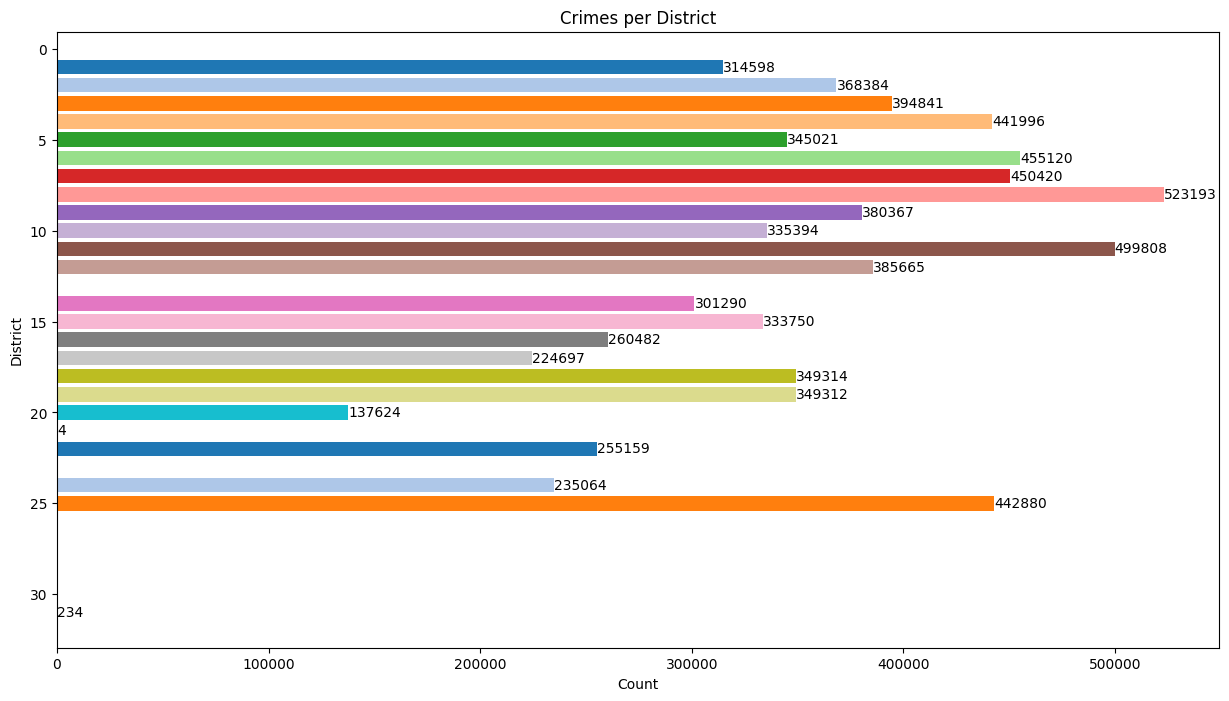

In [65]:
crimes_per_district = df['district'].value_counts().sort_index()
crimes_per_district_df = crimes_per_district.reset_index()
crimes_per_district_df.columns = ['district', 'count']
print(crimes_per_district_df)

color = plt.cm.tab20.colors

plt.figure(figsize=(15, 8))
bars=plt.barh(crimes_per_district_df['district'], crimes_per_district_df['count'], color=color)
plt.xlabel('Number of Cases')
plt.ylabel('District') 
plt.title('Crimes per District')
plt.gca().invert_yaxis()  

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width()}', 
             va='center', ha='left', fontsize=10)

plt.show()


##### During the 23 years, the district with the highest amount of criminal cases was district 8.

## Crimes per type of crime - TOP 10 (chart)

iucr
0820    631091
0486    608546
0460    562012
1320    417787
0810    414635
1310    410178
0560    347657
0910    297458
0610    284225
1811    279068
Name: id, dtype: int64


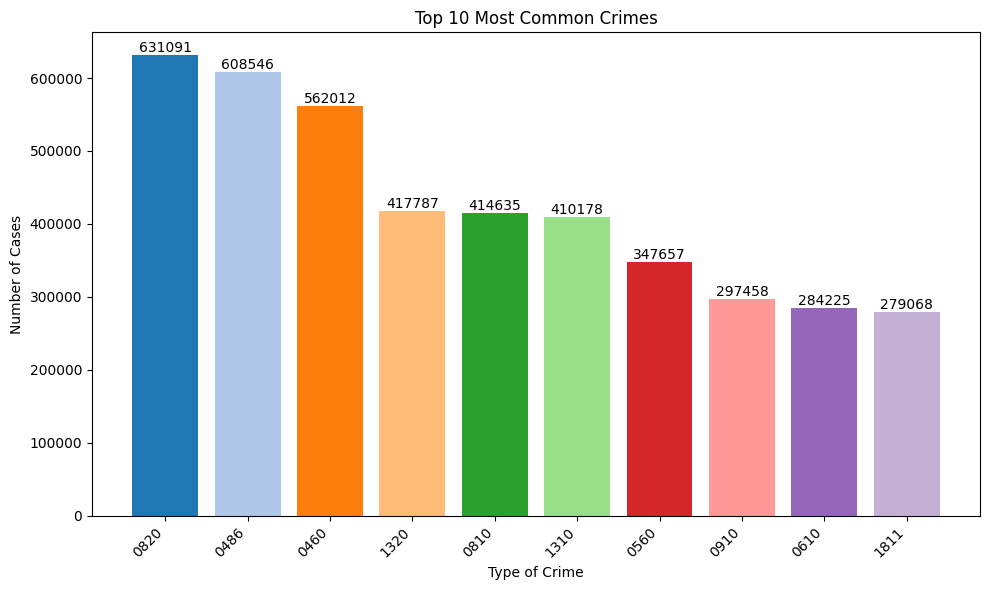

In [91]:
crimes = df.groupby(['iucr'])['id'].count()
top_10_crimes = crimes.sort_values(ascending=False).head(10)
print(top_10_crimes)

color = plt.cm.tab20.colors

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_crimes.index, top_10_crimes.values, color=color)
plt.ylabel('Number of Cases') 
plt.xlabel('Type of Crime') 
plt.title('Top 10 Most Common Crimes')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() * 0.5, bar.get_height(),
             f'{bar.get_height():.0f}',
             va='bottom', ha='center', fontsize=10, color='black')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### The most commited crime in the city of Chicago from 2001 to 2023 was the one with 0820 IUCR (Illinois Uniform Crime Reporting) which corresponds to the crime of theft of $500 and under.

## Crimes per Year (chart)

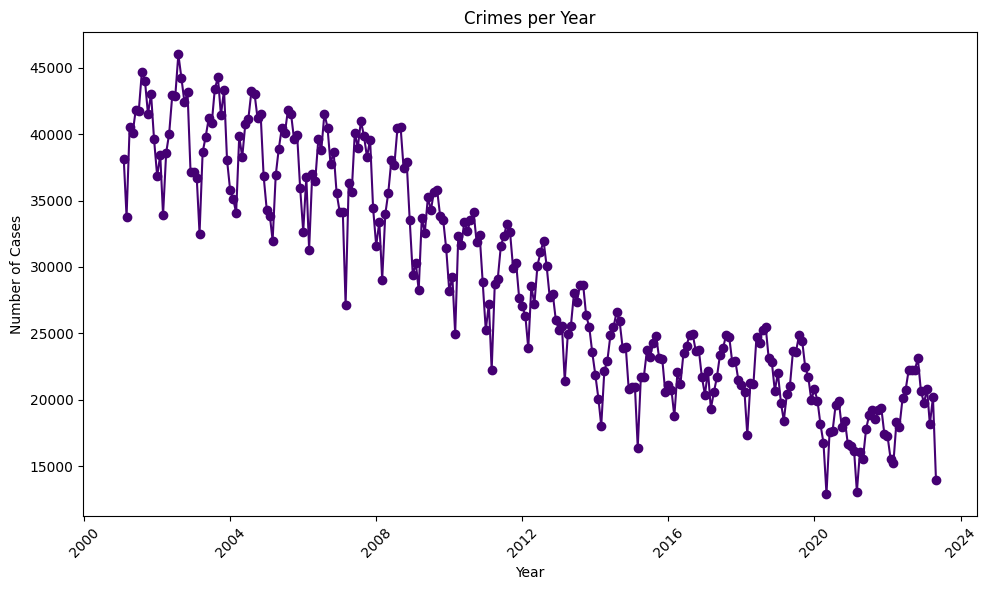

In [85]:
df['date'] = pd.to_datetime(df['date'])
crime_per_month = df.resample("M"  , on = 'date').size()

plt.figure(figsize = (10,6))
plt.plot(crime_per_month.index , crime_per_month.values , marker = 'o', color = '#450073')
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.title("Crimes per Year")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

##### The amount of crimes in the city of Chicago seems to have decreased over the past 22 years. Keep in mind that the crime quantity decreased suddenly in 2023 because the data covers crimes up until half of 2023.

## Arrested or not (chart)

   Arrest    count
0    True  2034764
1   False  5749900


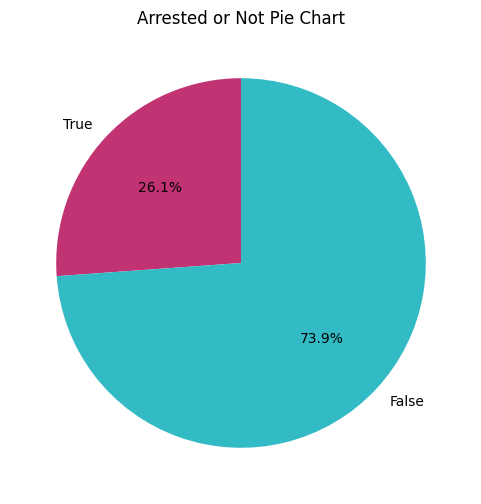

In [98]:
arrested_or_not = df['arrest'].value_counts().sort_index(ascending=False)
arrested_or_not_df = arrested_or_not.reset_index()
arrested_or_not_df.columns = ['Arrest', 'count']
print(arrested_or_not_df)

plt.figure(figsize=(6, 6))
colors = ['#C23373', '#33BBC5']
plt.pie(arrested_or_not_df['count'], labels=arrested_or_not_df['Arrest'], colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Arrested or Not')

plt.show()

##### We can see that in most cases, the perpetrator of the crime was no arrested.

## Top 10 days with more cases (table)

In [25]:
num_cases_day = df.groupby(['date'])['id'].count()

top_10_days = num_cases_day.sort_values(ascending=False).head(10)

print(top_10_days)

date
2008-01-01 00:01:00    304
2007-01-01 00:01:00    259
2006-01-01 00:01:00    226
2004-01-01 00:00:00    218
2005-01-01 00:01:00    215
2003-01-01 00:01:00    213
2003-01-01 00:00:00    210
2007-01-01 00:00:00    205
2009-01-01 00:01:00    198
2015-01-01 00:01:00    198
Name: id, dtype: int64


## Average time difference between Date of crime and update in days (chart)

arrest
False    2727.437314
True     3182.504831
Name: time_difference, dtype: float64


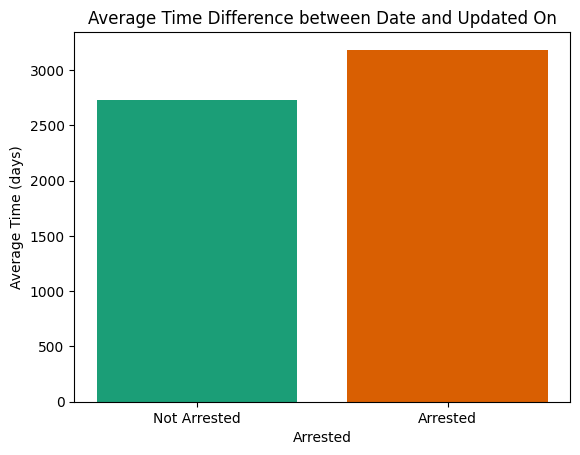

In [13]:
df['time_difference'] = (df['updated_on'] - df['date']).dt.days

average_time_per_arrest = df.groupby('arrest')['time_difference'].mean()

print(average_time_per_arrest)


colors1 = plt.cm.Dark2.colors

plt.bar(average_time_per_arrest.index, average_time_per_arrest, color= colors1)
plt.xlabel('Arrested')
plt.ylabel('Average Time (days)')
plt.title('Average Time Difference between Date and Updated On')
plt.xticks([False, True], ['Not Arrested', 'Arrested'])

plt.show()

##### We can see that the average time it takes for the case to be updated is longer when the perpetrator was arrested rather than when they weren't, we wanted to discover if the case took longer to update when the criminal wasn't arrested, but it turns out that it's the opposite.

## Top 10 Location Descriptions with Highest Number of Cases (chart)

location_desc
STREET                            2045225
RESIDENCE                         1313506
APARTMENT                          891006
SIDEWALK                           732097
OTHER                              270017
PARKING LOT/GARAGE(NON.RESID.)     202985
ALLEY                              174393
SMALL RETAIL STORE                 148878
SCHOOL, PUBLIC, BUILDING           146387
RESIDENCE-GARAGE                   135543
Name: id, dtype: int64


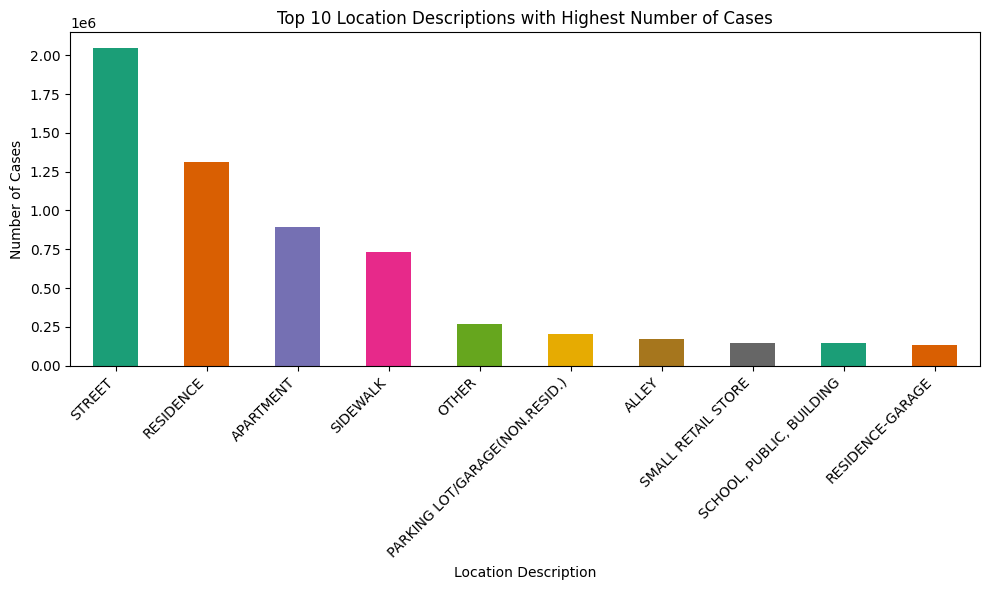

In [14]:
num_loc_desc = df.groupby(['location_desc'])['id'].count()

location_desc = num_loc_desc.sort_values(ascending=False).head(10)

print(location_desc)


plt.figure(figsize=(10, 6))
location_desc.plot(kind='bar', color= colors1)
plt.xlabel('Location Description')
plt.ylabel('Number of Cases')
plt.title('Top 10 Location Descriptions with Highest Number of Cases')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

##### We can see that most crimes in Chicago were committed in the streets.